# 预训练模型预测-文字区域检测

同济子豪兄 2023-6-20

## 导入工具包

In [1]:
from mmocr.apis import MMOCRInferencer

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入模型，实例化MMOCRInferencer

In [16]:
# infer = MMOCRInferencer(det='dbnetpp')

infer = MMOCRInferencer(det='textsnake')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Downloading: "https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth" to /home/featurize/.cache/torch/hub/checkpoints/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


## 载入预测图像

In [17]:
img_path = 'mmocr/demo/demo_text_det.jpg'

In [18]:
img_bgr = cv2.imread(img_path)

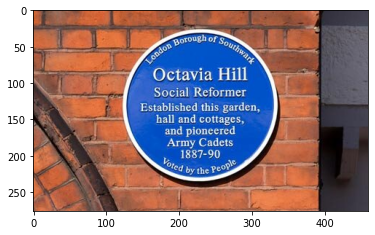

In [19]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 执行预测

In [20]:
result = infer(img_path, return_vis=True)

Output()

## 解析预测结果-文字区域及置信度

In [21]:
result.keys()

dict_keys(['predictions', 'visualization'])

In [26]:
# result['predictions']

## 解析预测结果-文字区域可视化

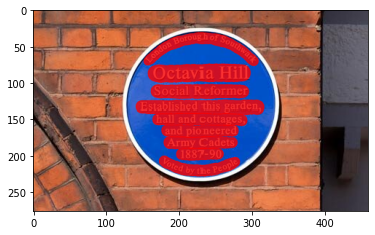

In [23]:
plt.imshow(result['visualization'][0])
plt.show()

## 解析预测结果-文字区域轮廓可视化

In [24]:
for each in result['predictions'][0]['det_polygons']: # 遍历每一片文字区域
    
    # 获取该文字区域轮廓点的坐标
    points = [np.array(each, dtype=np.int32).reshape((-1, 1, 2))]
    
    # 绘制该文字区域的轮廓
    img_bgr = cv2.polylines(img_bgr, points, isClosed=True, color=[0, 255, 0], thickness=1) 

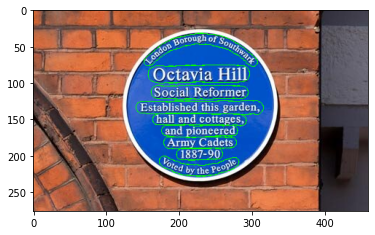

In [25]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()